In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

data = fetch_openml('adult',version = 3, as_frame = True) #as_frame - It loads data as Pandas DataFrame.

df = data.frame

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(48790, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48790 non-null  int64   
 1   workclass       45995 non-null  category
 2   fnlwgt          48790 non-null  int64   
 3   education       48790 non-null  category
 4   education_num   48790 non-null  int64   
 5   marital_status  48790 non-null  category
 6   occupation      45985 non-null  category
 7   relationship    48790 non-null  category
 8   race            48790 non-null  category
 9   sex             48790 non-null  category
 10  capital_gain    48790 non-null  int64   
 11  capital_loss    48790 non-null  int64   
 12  hours_per_week  48790 non-null  int64   
 13  native_country  47934 non-null  category
 14  class           48790 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [58]:
df['class'].value_counts() #check class imbalance

class
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [5]:
df = df.dropna() # Remove rows having missing values

In [6]:
X = df.drop('class', axis=1)  # all columns except target
y = df['class'] # target

In [7]:
cat_cols = X.select_dtypes(include=['category','object']).columns # Identify categorical columns


X = pd.get_dummies(X, columns=cat_cols, drop_first=True) # Convert categorical to numeric using One-Hot Encoding

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # Split data for training and testing

In [63]:
# PART 1 - Train Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42) # Create Decision Tree model
dt.fit(X_train, y_train) # Train the model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

y_pred = dt.predict(X_test) # Predict on test data

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred, pos_label='>50K'))

Accuracy: 0.8087437742114001
Precision: 0.6021413276231263
Recall: 0.6376417233560091


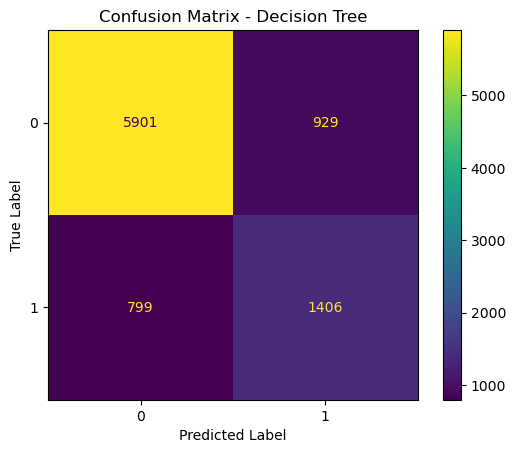

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
"""

Decision Tree – Confusion Matrix

- Correctly predicted <=50K: 5901 cases  
- Correctly predicted >50K: 1406 cases  

- Wrongly predicted >50K (False Positive): 929
- Wrongly predicted <=50K (False Negative): 799

- Model performs better on <=50K class. 
- Many wrong >50K predictions → low precision.  
- Shows overfitting and limited generalization.

"""

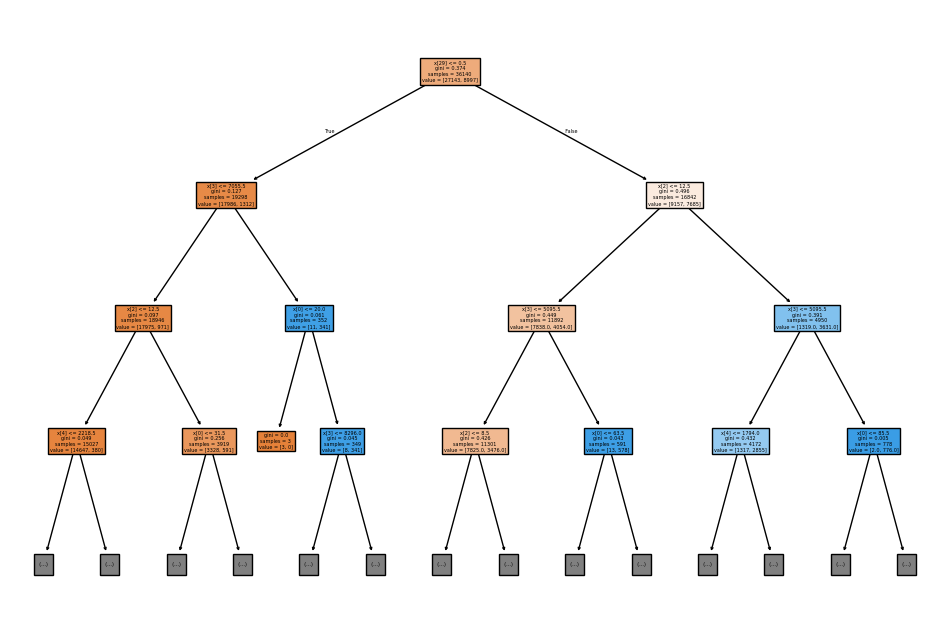

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Tree Visualization
plt.figure(figsize=(12,8))
plot_tree(dt, max_depth=3, filled=True)
plt.show()

In [ ]:
"""
Tree Visualization

- Displays decision logic of the Decision Tree.  
- Each split represents a rule based on a feature.  
- Helps understand how predictions are made.

"""

In [68]:
# PART 2 - Random Forest & Ensembles

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6830
        >50K       0.72      0.65      0.68      2205

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035



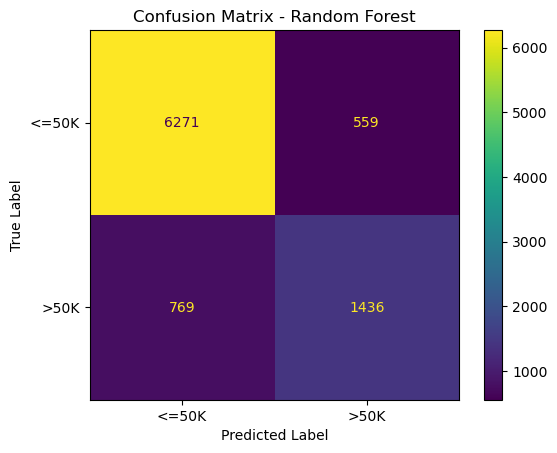

In [17]:
rf_pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["<=50K", ">50K"]
)

disp.plot()

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
"""

Random Forest – Confusion Matrix Interpretation

- Correctly predicted <=50K: 6271
- Correctly predicted >50K: 1436

- False Positives (predicted >50K but actually <=50K): 559
- False Negatives (predicted <=50K but actually >50K): 769

- Random Forest improved predictions compared to Decision Tree.  
- Fewer false positives than Decision Tree (929 → 559).  
- Slight reduction in false negatives (799 → 769).  
- Model is more balanced and generalizes better.

"""

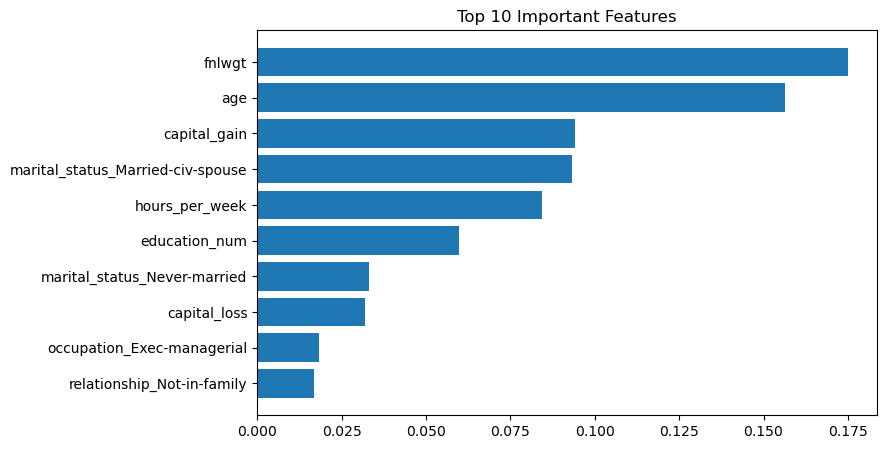

In [18]:
importances = rf.feature_importances_ # importance score of each feature

indices = np.argsort(importances)[-10:] # get indexes of top 10 features

# Feature Importance
plt.figure(figsize=(8,5))
plt.barh(range(10), importances[indices])
plt.yticks(range(10), X.columns[indices])
plt.title("Top 10 Important Features")
plt.show()

In [72]:
"""
Feature Importance

- Random Forest measures how much each feature helps in reducing impurity.
- Features that create better splits across many trees get higher importance scores.
- It helps to identify which variables (e.g., capital_gain, age) influence income prediction the most.
- Feature importance improves model interpretability and supports business understanding.

"""

In [73]:
# PART 3 - Gradient Boosting (XGBoost / LightGBM)

In [ ]:
# Implementing Gradient Boosting using XGBoost

In [99]:
!pip install xgboost

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train) #XGBoost cannot understand text; LabelEncoder converts it into numbers
y_test_enc = le.fit_transform(y_test)

from xgboost import XGBClassifier

xgb = XGBClassifier (n_estimators = 100, 
                     learning_rate = 0.1,
                     max_depth = 6, 
                     random_state = 42,
                     eval_metric = 'logloss') # metric used to measure training performance ; Logloss = error in predicted probabilities

xgb.fit(X_train,y_train_enc)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [20]:
pred = xgb.predict(X_test) # Predict on test data; gives numeric labels

pred_labels = le.inverse_transform(pred) # Converting numeric predictions back to original class names

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6830
        >50K       0.78      0.68      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.84      0.81      0.82      9035
weighted avg       0.87      0.87      0.87      9035



In [ ]:
"""

Comparison: Random Forest vs XGBoost

- XGBoost accuracy 0.87 is higher than Random Forest 0.85.
- Precision for >50K improved from 0.72 → 0.78.
- Recall for >50K improved from 0.65 → 0.68.
- F1-score for >50K increased from 0.68 → 0.72.
- XGBoost focuses on previous errors using sequential learning.
- Boosting reduces both bias and variance, RF mainly reduces variance.
- XGBoost requires label encoding and parameter tuning.
- Overall, XGBoost is the better performing model for this dataset than RF.

"""

In [ ]:
# Implementing Gradient Boosting using LightGBM (for learning purpose)

In [21]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators= 100,
    learning_rate=0.1,
    max_depth= 6,
    random_state= 42
)

lgb.fit(X_train,y_train_enc)

[LightGBM] [Info] Number of positive: 8997, number of negative: 27143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 36140, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248949 -> initscore=-1.104228
[LightGBM] [Info] Start training from score -1.104228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [108]:
lgb_pred = lgb.predict(X_test)

lgb_pred_labels = le.inverse_transform(lgb_pred)

print(classification_report(y_test,lgb_pred_labels))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6830
        >50K       0.78      0.67      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.84      0.80      0.82      9035
weighted avg       0.87      0.87      0.87      9035



In [ ]:
"""
1. LightGBM vs Random Forest

- LightGBM accuracy 0.87 is higher than RF 0.85.
- Precision for >50K: 0.78 (LGBM) > 0.72 (RF).
- Recall for >50K: 0.67 (LGBM) > 0.65 (RF).
- RF uses bagging; LightGBM uses boosting with sequential learning.
- LightGBM handles complex relations better than RF.
- RF is more stable with less tuning; LGBM needs tuning.
- Overall, LightGBM clearly outperforms Random Forest.

2. LightGBM vs XGBoost
- Performance metrics of both models are almost similar with accuracy around 0.87.
- LightGBM grows trees leaf-wise, XGBoost grows level-wise.
- LightGBM trains faster and uses less memory.
- Performance difference is minimal; both are strong boosting models.
- XGBoost slightly better for recall; LightGBM better for training speed and efficiency.

"""

In [ ]:
# Part 4 -  Hyperparameter Tuning & Interpretability

In [ ]:
# Hyperparameter Tuning using RandomizedSearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Dictionary of hyperparameters to try
param_dist = {
    'n_estimators': [60, 80, 100, 120],  # number of trees
    'max_depth': [4, 5, 6, 7],           # depth of each tree
    'learning_rate': [0.03, 0.05, 0.1, 0.2]   # step size while learning
}

random_search = RandomizedSearchCV(
    
        XGBClassifier(eval_metric='logloss', random_state=42), # Base model on which tuning will happen
        param_distributions=param_dist ,  # hyperparameter search space
        n_iter=6,       # try only 6 random combinations
        cv=3,           # 3-fold cross validation
        scoring='accuracy',  # choose best model based on accuracy
        random_state=42     
)

random_search.fit(X_train, y_train_enc) # Train multiple models with different combinations

print(random_search.best_params_)

best_random = random_search.best_estimator_

pred_random = best_random.predict(X_test)
pred_random_labels = le.inverse_transform(pred_random)

print(classification_report(y_test, pred_random_labels))

{'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.2}
              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.92      6830
        >50K       0.77      0.67      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.83      0.80      0.82      9035
weighted avg       0.87      0.87      0.87      9035



In [ ]:
# Hyperparameter Tuning using GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

# All possible combinations that GridSearch will try
param_grid = {
    'n_estimators': [80, 100],      # number of trees
    'max_depth': [4, 6],            # depth of each tree
    'learning_rate': [0.05, 0.1]    # step size while learning
}

grid = GridSearchCV(

        XGBClassifier(eval_metric='logloss', random_state=42),
        param_grid,     # hyperparameter combinations
        cv=3,        
        scoring='accuracy'  # choose best model based on accuracy  
)


grid.fit(X_train, y_train_enc)


print(grid.best_params_)

best_xgb = grid.best_estimator_

pred = best_xgb.predict(X_test)
pred_labels = le.inverse_transform(pred)

print(classification_report(y_test, pred_labels))

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6830
        >50K       0.78      0.68      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.84      0.81      0.82      9035
weighted avg       0.87      0.87      0.87      9035



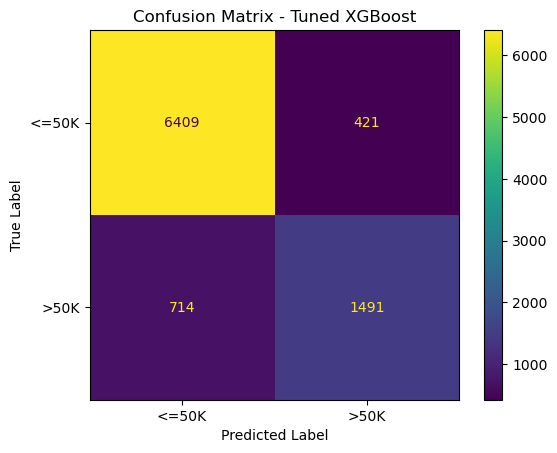

In [24]:
# Create confusion matrix
cm = confusion_matrix(y_test, pred_labels)

disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["<=50K", ">50K"]
)

disp.plot()

plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
"""
Tuned XGBoost – Confusion Matrix 

- Correctly predicted <=50K: 6409
- Correctly predicted >50K: 1491

- False Positives (predicted >50K but actually <=50K): 421
- False Negatives (predicted <=50K but actually >50K): 714

- Tuned XGBoost gives the best results among all models.
- False positives reduced significantly compared to RF (559 → 421).  
- False negatives also decreased (769 → 714).  
- Tuned XGBoost generalizes well and is selected as the final model for income prediction.

"""

In [ ]:
# SHAP Values

In [124]:
!pip install shap

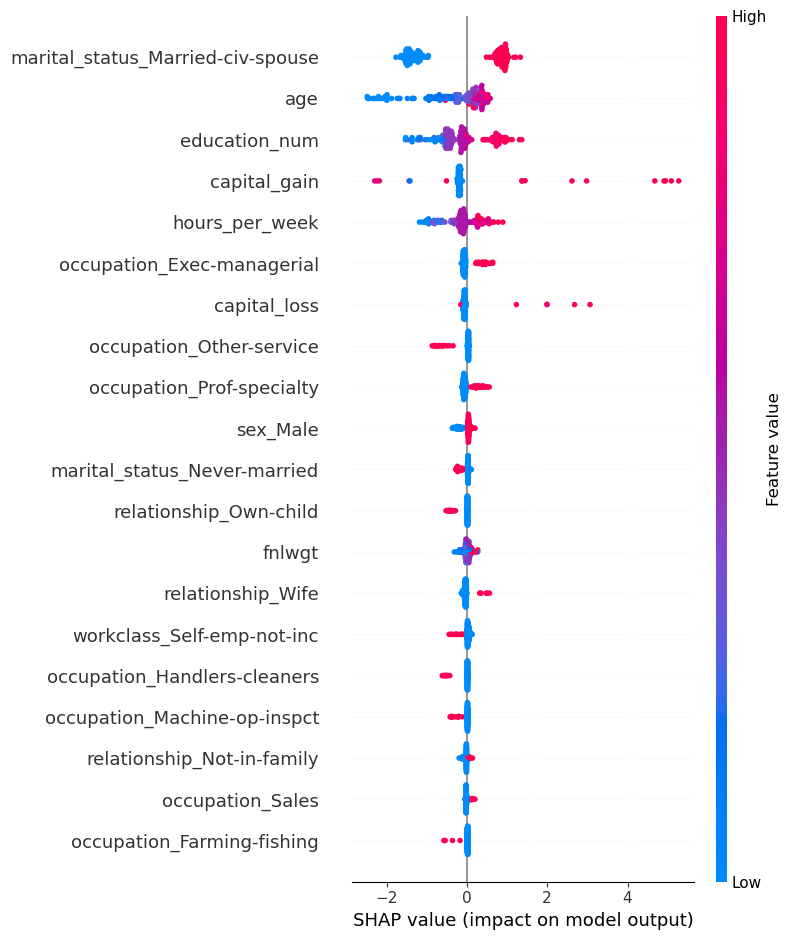

In [25]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test[:200]) # Calculate SHAP values for first 200 test samples

shap.summary_plot(shap_values, X_test[:200])


In [ ]:
"""

SHAP Values Interpretation

- The SHAP summary plot explains how each feature influences the XGBoost predictions.

- Red dots → higher feature values and Blue dots → lower feature values  

- Position to the right → increases chance of >50K and Position to the left → increases chance of ≤50K

- Income is strongly related to marital status, education level and age.  

- Working hours and occupation also influence the model decisions.  

"""

In [3]:
# Comparison Table - Evaluation Metrics of all Models
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost", "LightGBM", "Tuned XGBoost (Grid)"],
    "Accuracy": [0.81, 0.85, 0.87, 0.87, 0.87],
    "Precision (>50K)": [0.60, 0.72, 0.78, 0.78, 0.78],
    "Recall (>50K)": [0.63, 0.65, 0.68, 0.67, 0.68],
    "F1 Score": [0.61, 0.68, 0.72, 0.72, 0.72],
    "ROC-AUC": [0.75, 0.90, 0.92, 0.92, 0.93]
}

df = pd.DataFrame(data)
df

,Model,Accuracy,Precision (>50K),Recall (>50K),F1 Score,ROC-AUC
0,Decision Tree,0.81,0.60,0.63,0.61,0.75
1,Random Forest,0.85,0.72,0.65,0.68,0.90
2,XGBoost,0.87,0.78,0.68,0.72,0.92
3,LightGBM,0.87,0.78,0.67,0.72,0.92
4,Tuned XGBoost (Grid),0.87,0.78,0.68,0.72,0.93


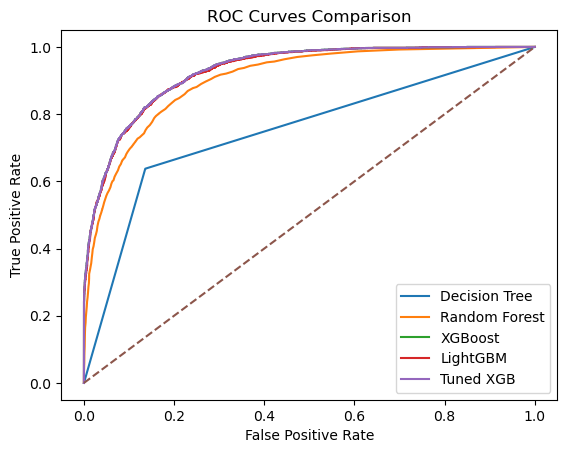

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure()

# Decision Tree
fpr, tpr, _ = roc_curve(y_test.map({'>50K':1,'<=50K':0}), dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Decision Tree")

# Random Forest
fpr, tpr, _ = roc_curve(y_test.map({'>50K':1,'<=50K':0}), rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Random Forest")

# XGBoost
fpr, tpr, _ = roc_curve(y_test.map({'>50K':1,'<=50K':0}), xgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="XGBoost")

# LightGBM
fpr, tpr, _ = roc_curve(y_test.map({'>50K':1,'<=50K':0}), lgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="LightGBM")

# Tuned XGB
fpr, tpr, _ = roc_curve(y_test.map({'>50K':1,'<=50K':0}), best_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Tuned XGB")

plt.plot([0,1], [0,1], linestyle='--')   # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


In [ ]:
"""

Overall Conclusion

- Ensemble models (RF, XGBoost, LightGBM) clearly outperform the single Decision Tree.  
- Boosting models handle the minority class (>50K) better, giving higher precision and recall.  
- XGBoost and LightGBM show similar performance, but boosting provides stronger ROC-AUC than RF.
- ROC-AUC comparison clearly shows that Tuned XGBoost is the most reliable model because it provides the 
  strongest discrimination between <=50K and >50K classes.
- Hyperparameter tuned XGBoost using GridSearch gives the most stable and reliable results.  
- Final Selected Model: GridSearch Tuned XGBoost due to highest ROC-AUC and balanced F1-score.


"""